In [ ]:
%matplotlib

# Analysis of Weather Data and Traffic Collisions

In [30]:
# Import Dependencies
import pandas as pd
import numpy as np
import os
import time
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib as mpl
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [31]:
combined_data_csv = os.path.join("..", "data", "master_clean_data", "nyc_final_merged.csv")

csv = pd.read_csv(combined_data_csv, low_memory=False)

In [32]:
master_df = pd.DataFrame(csv)
master_df.head()

,DATE,C_YEAR,C_WEEK,DEATHS,INJURIES,Detail,humidity,precipIntensity,cloudCover,temperatureMin,visibility,windSpeed,Moonphase
0,2014-01-01,2014,1,0.0,0.0,partly-cloudy-day,0.56,0.0,0.44,23.02,10.0,1.43,0.02
1,2014-01-01,2014,1,0.0,0.0,partly-cloudy-day,0.56,0.0,0.44,23.02,10.0,1.43,0.02
2,2014-01-01,2014,1,0.0,0.0,partly-cloudy-day,0.56,0.0,0.44,23.02,10.0,1.43,0.02
3,2014-01-01,2014,1,0.0,1.0,partly-cloudy-day,0.56,0.0,0.44,23.02,10.0,1.43,0.02
4,2014-01-01,2014,1,0.0,1.0,partly-cloudy-day,0.56,0.0,0.44,23.02,10.0,1.43,0.02


In [33]:
week_df = master_df.groupby(['C_YEAR', 'C_WEEK'])
week_df.count().reset_index().head()

,C_YEAR,C_WEEK,DATE,DEATHS,INJURIES,Detail,humidity,precipIntensity,cloudCover,temperatureMin,visibility,windSpeed,Moonphase
0,2014,1,2163,2163,2163,2163,2163,2163,2163,2163,2163,2163,2163
1,2014,2,3706,3706,3706,3706,3706,3706,3706,3706,3706,3706,3706
2,2014,3,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648,3648
3,2014,4,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276,4276
4,2014,5,3805,3805,3805,3805,3805,3805,3805,3805,3805,3805,3805


In [34]:
avg_temp = week_df['temperatureMin'].mean()
collisions = week_df['temperatureMin'].count()
visibility = week_df['visibility'].mean()
cloudCover = week_df['cloudCover'].mean()
Moonphase = week_df['Moonphase'].mean()
windSpeed = week_df['windSpeed'].mean()
humidity = week_df['humidity'].mean()
precipIntensity = week_df['precipIntensity'].mean()
injuries = week_df['INJURIES'].sum()
deaths = week_df['DEATHS'].sum()

In [35]:
weekly_summary = pd.DataFrame({"Collisions": collisions, "Injuries": injuries, "Deaths": deaths, "Avg Min Temp": avg_temp,\
                              "Visibility": visibility, "Cloud Cover" : cloudCover, "Moonphase": Moonphase,\
                              "Windspeed": windSpeed, "Humidity" : humidity, "Precipitation Intensity" : precipIntensity})
weekly_summary.head()

Collisions  Injuries  Deaths  Avg Min Temp  Visibility  \
C_YEAR C_WEEK                                                           
2014   1             2163     486.0     6.0     14.909945    7.817582   
       2             3706     929.0     7.0     21.183702    7.960103   
       3             3648    1012.0     5.0     32.301870    8.515548   
       4             4276     835.0     3.0     12.920667    8.220451   
       5             3805     923.0     3.0     20.003824    9.450696   

               Cloud Cover  Moonphase  Windspeed  Humidity  \
C_YEAR C_WEEK                                                
2014   1          0.598215   0.082090   3.365414  0.697887   
       2          0.579652   0.295159   3.245092  0.664514   
       3          0.625156   0.510455   1.778684  0.781845   
       4          0.560101   0.731513   4.514790  0.606195   
       5          0.455911   0.597091   2.210689  0.536993   

               Precipitation Intensity  
C_YEAR C_WEEK                           
2014   1                      0.000226  
       2                      0.005006  
       3                      0.002238  
       4                      0.000081  
       5                      0.000067

In [36]:
df = weekly_summary.reset_index()
df.head()

,C_YEAR,C_WEEK,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity
0,2014,1,2163,486.0,6.0,14.909945,7.817582,0.598215,0.082090,3.365414,0.697887,0.000226
1,2014,2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006
2,2014,3,3648,1012.0,5.0,32.301870,8.515548,0.625156,0.510455,1.778684,0.781845,0.002238
3,2014,4,4276,835.0,3.0,12.920667,8.220451,0.560101,0.731513,4.514790,0.606195,0.000081
4,2014,5,3805,923.0,3.0,20.003824,9.450696,0.455911,0.597091,2.210689,0.536993,0.000067


In [37]:
df.dtypes

C_YEAR                       int64
C_WEEK                       int64
Collisions                   int64
Injuries                   float64
Deaths                     float64
Avg Min Temp               float64
Visibility                 float64
Cloud Cover                float64
Moonphase                  float64
Windspeed                  float64
Humidity                   float64
Precipitation Intensity    float64
dtype: object

In [38]:
df['YEAR_WEEK'] = df['C_YEAR'].map(str) + "/" + df['C_WEEK'].map(str)
df.head()

,C_YEAR,C_WEEK,Collisions,Injuries,Deaths,Avg Min Temp,Visibility,Cloud Cover,Moonphase,Windspeed,Humidity,Precipitation Intensity,YEAR_WEEK
0,2014,1,2163,486.0,6.0,14.909945,7.817582,0.598215,0.082090,3.365414,0.697887,0.000226,2014/1
1,2014,2,3706,929.0,7.0,21.183702,7.960103,0.579652,0.295159,3.245092,0.664514,0.005006,2014/2
2,2014,3,3648,1012.0,5.0,32.301870,8.515548,0.625156,0.510455,1.778684,0.781845,0.002238,2014/3
3,2014,4,4276,835.0,3.0,12.920667,8.220451,0.560101,0.731513,4.514790,0.606195,0.000081,2014/4
4,2014,5,3805,923.0,3.0,20.003824,9.450696,0.455911,0.597091,2.210689,0.536993,0.000067,2014/5


In [10]:
sns.set_style("darkgrid")

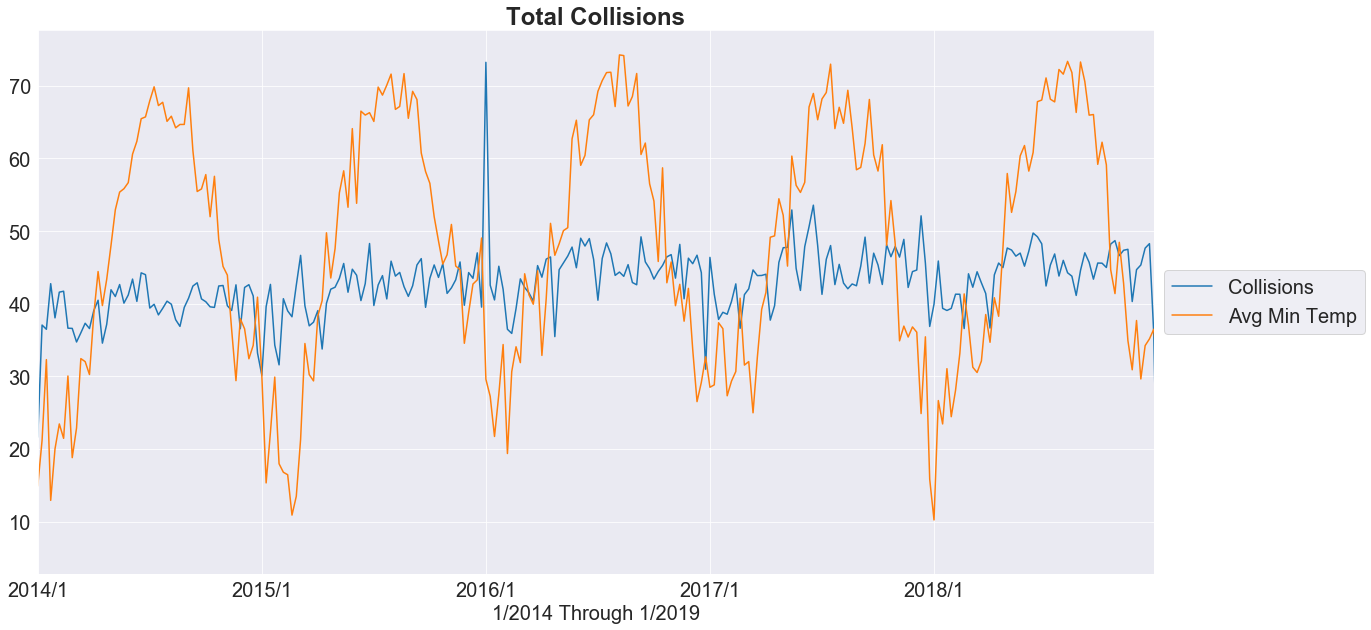

In [28]:
plt.plot(df['YEAR_WEEK'], df['Collisions']/100)
plt.plot(df['YEAR_WEEK'], df['Avg Min Temp'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f'Total Collisions', fontweight="bold")
plt.xlabel('1/2014 Through 1/2019')
plt.ylabel('')
plt.ylim()
plt.xlim("2014/1" , "2018/52")
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(13))
#save figure
#plt.savefig(os.path.join('..', 'images', 'mintemp-vs-deaths_daily.png'))
#show figure
plt.rcParams['figure.figsize'] = [20,10]
mpl.rcParams.update({'font.size': 20})
plt.show()

In [12]:
x = df['Avg Min Temp']
s = df['Cloud Cover']
t = df['Visibility']
u = df['Humidity']
v = df['Precipitation Intensity']
w = df['Windspeed']
r = df['Moonphase']
y = df['Injuries']
z = df['Collisions']

# Creating Scatter Plots with Regression, R Value, P value, and Std. Error

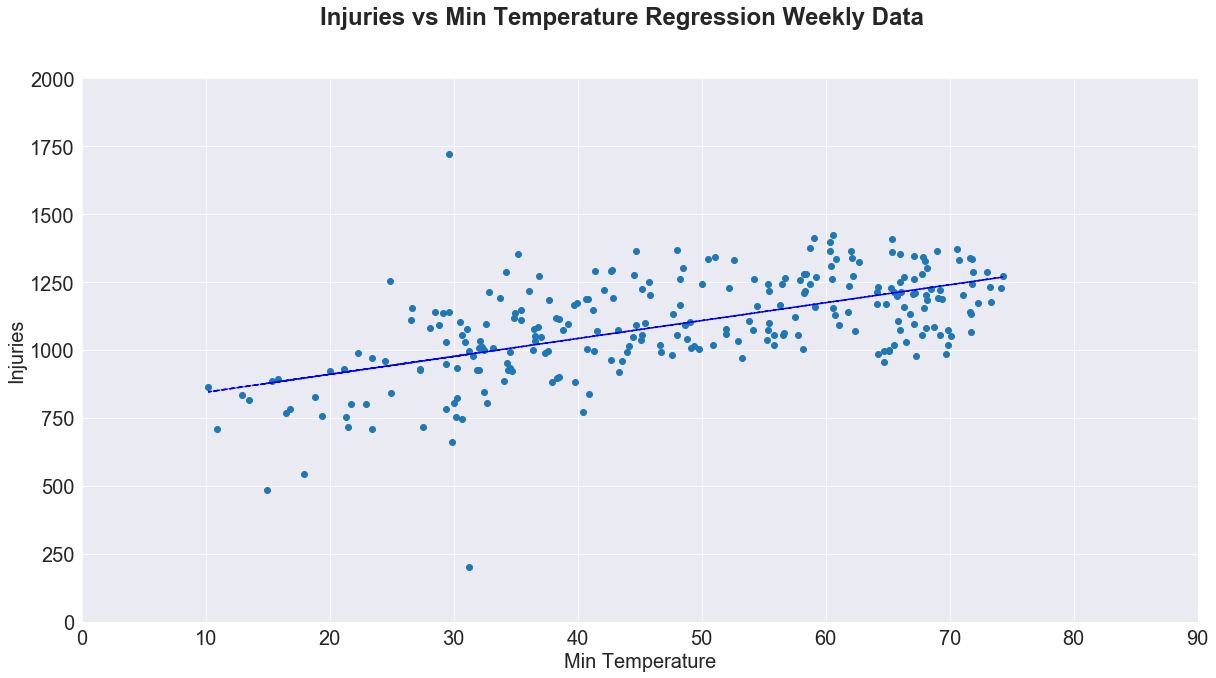

r-squared: 0.347532770172
p value: 8.06594255788e-26
Standard Error: 0.561039818396


In [13]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(0, 2000)

ax.set_xlabel("Min Temperature", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

#plt.savefig("../Images/Injuries vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

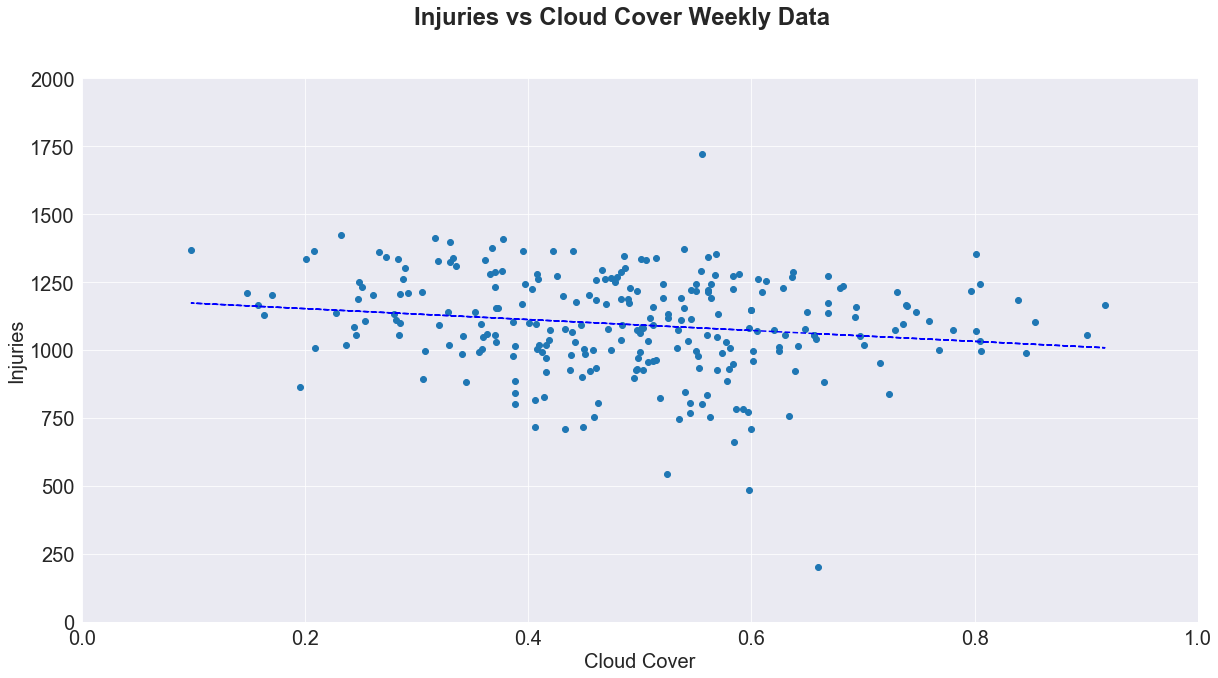

r-squared: 0.0276539783729
p value: 0.00709285134482
Standard Error: 73.9795080537


In [14]:
(slope, intercept, _, _, _) = linregress(s, y)
fit = slope * s + intercept
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Cloud Cover Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 2000)

ax.set_xlabel("Cloud Cover", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(s, y, linewidth=0, marker='o')
ax.plot(s, fit, 'b--')

#plt.savefig("../Images/Injuries vs Weekly Cloud Cover")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(s,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

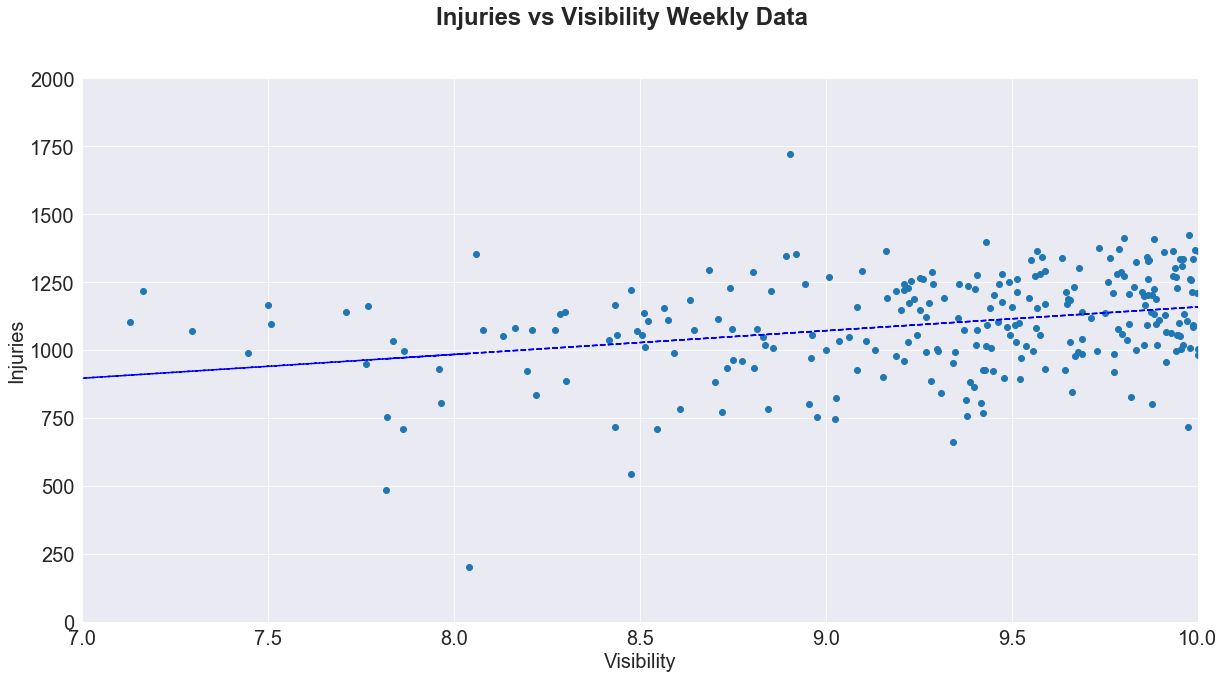

r-squared: 0.0988160364134
p value: 2.14663076206e-07
Standard Error: 16.4093547594


In [15]:
(slope, intercept, _, _, _) = linregress(t, y)
fit = slope * t + intercept
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Visibility Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(7, 10)
ax.set_ylim(0, 2000)

ax.set_xlabel("Visibility", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(t, y, linewidth=0, marker='o')
ax.plot(t, fit, 'b--')

#plt.savefig("../Images/Injuries vs Weekly Visibility")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(t,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

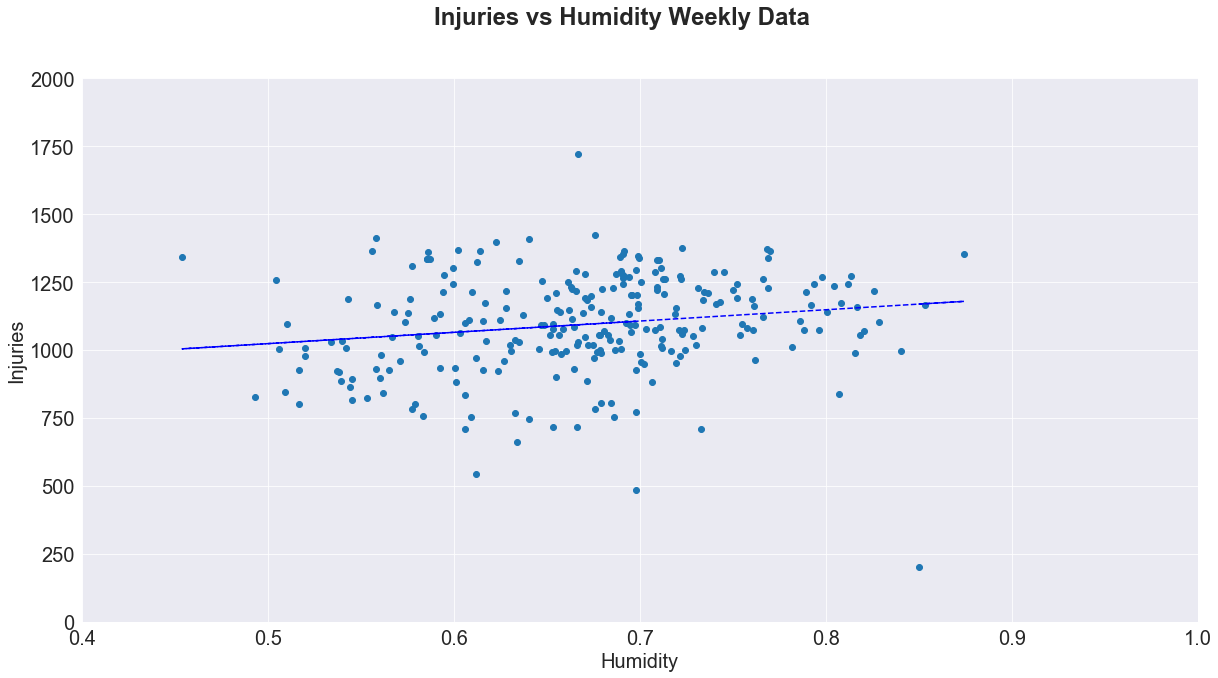

r-squared: 0.0314034528553
p value: 0.00407958752188
Standard Error: 143.414245404


In [16]:
(slope, intercept, _, _, _) = linregress(u, y)
fit = slope * u + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Humidity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0.4, 1)
ax.set_ylim(0, 2000)

ax.set_xlabel("Humidity", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(u, y, linewidth=0, marker='o')
ax.plot(u, fit, 'b--')

#plt.savefig("../Images/Injuries vs Weekly Humidity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(u,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

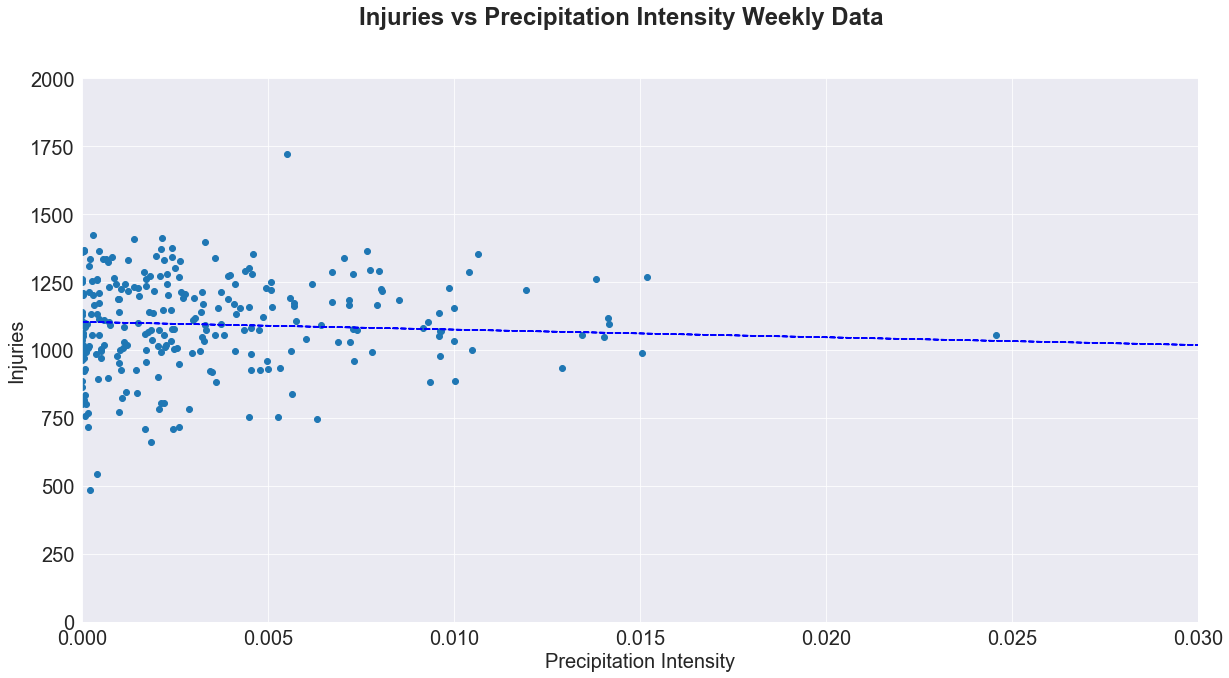

r-squared: 0.00388617027669
p value: 0.315734480688
Standard Error: 2822.30921986


In [17]:
(slope, intercept, _, _, _) = linregress(v, y)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Precipitation Intensity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 0.03)
ax.set_ylim(0, 2000)

ax.set_xlabel("Precipitation Intensity", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(v, y, linewidth=0, marker='o')
ax.plot(v, fit, 'b--')

#plt.savefig("../Images/Injuries vs Weekly Precipitation Intensity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(v,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

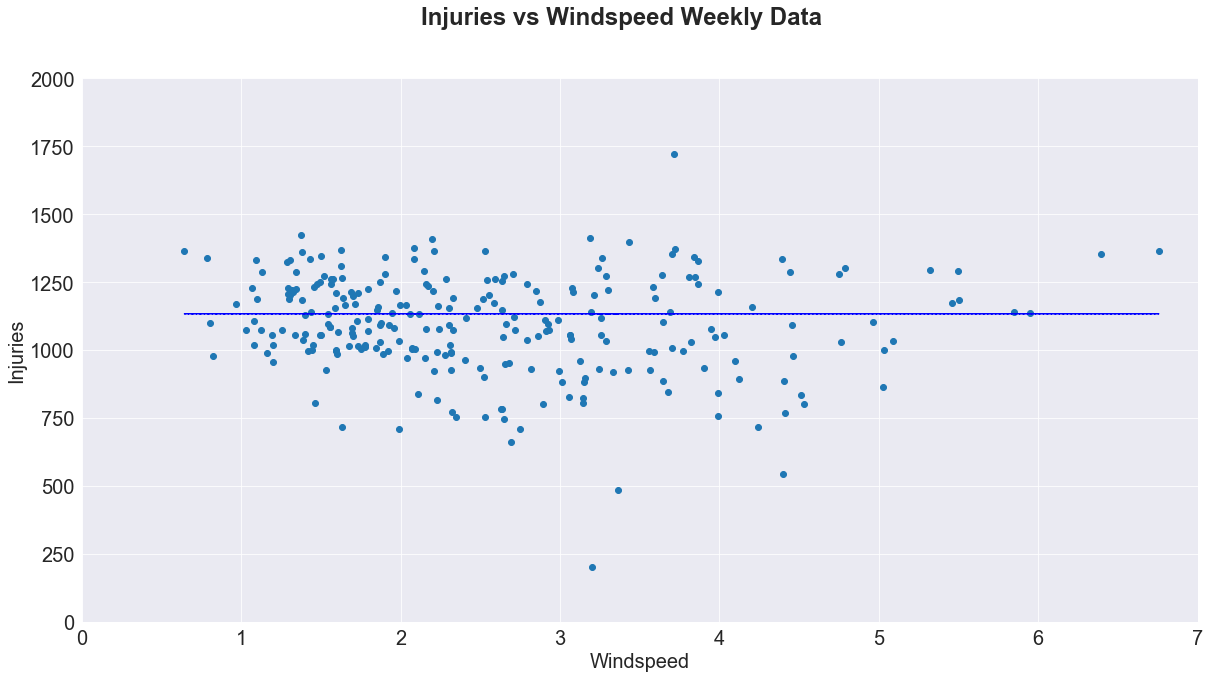

r-squared: 0.00934272357295
p value: 0.119302438844
Standard Error: 9.83882704858


In [18]:
(slope, intercept, _, _, _) = linregress(w, y)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Windspeed Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 7)
ax.set_ylim(0, 2000)

ax.set_xlabel("Windspeed", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(w, y, linewidth=0, marker='o')
ax.plot(w, fit, 'b--')

#plt.savefig("../Images/Injuries vs Windspeed")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(w,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

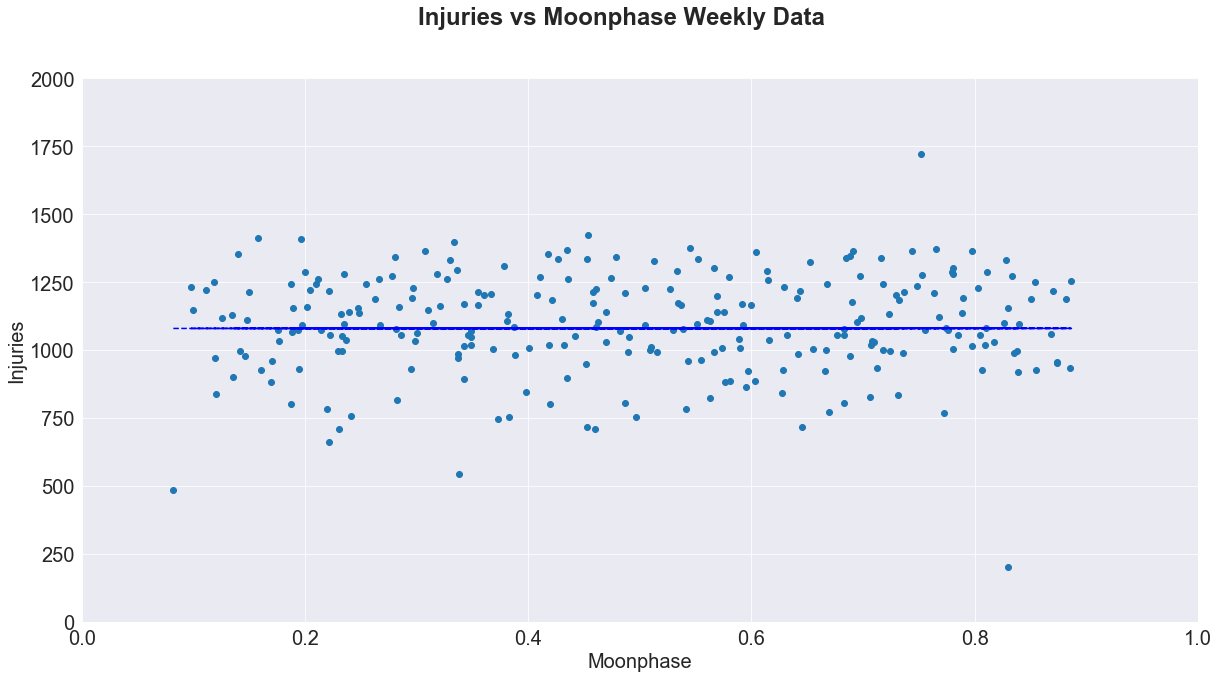

r-squared: 0.00123702388071
p value: 0.571626106662
Standard Error: 51.3148853214


In [19]:
(slope, intercept, _, _, _) = linregress(r, y)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Injuries vs Moonphase Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(0, 2000)

ax.set_xlabel("Moonphase", fontsize=20)
ax.set_ylabel("Injuries", fontsize=20)

ax.plot(r, y, linewidth=0, marker='o')
ax.plot(r, fit, 'b--')

#plt.savefig("../Images/Injuries vs Moonphase")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(r,y)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

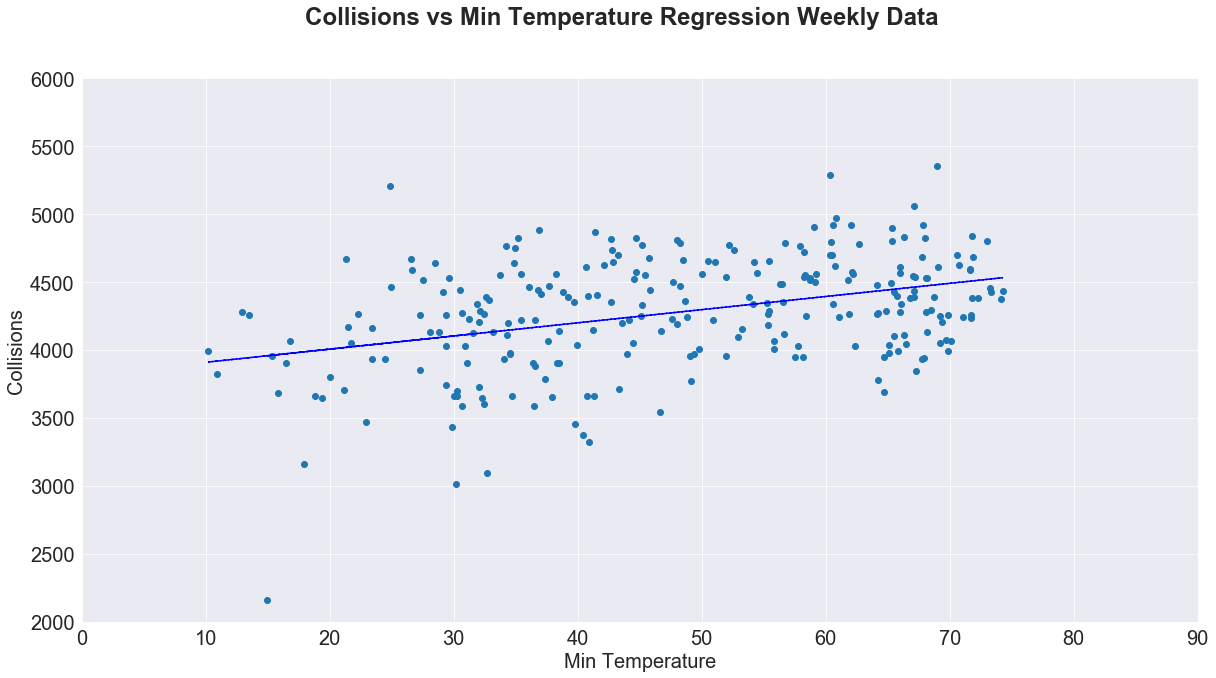

r-squared: 0.0989832415163
p value: 2.09401020624e-07
Standard Error: 1.81547066414


In [20]:
(slope, intercept, _, _, _) = linregress(x, z)
fit = slope * x + intercept
fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Min Temperature Regression Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 90)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Min Temperature", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(x, z, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')
#plt.savefig("../Images/Collisions vs Weekly Avg Min Temp")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

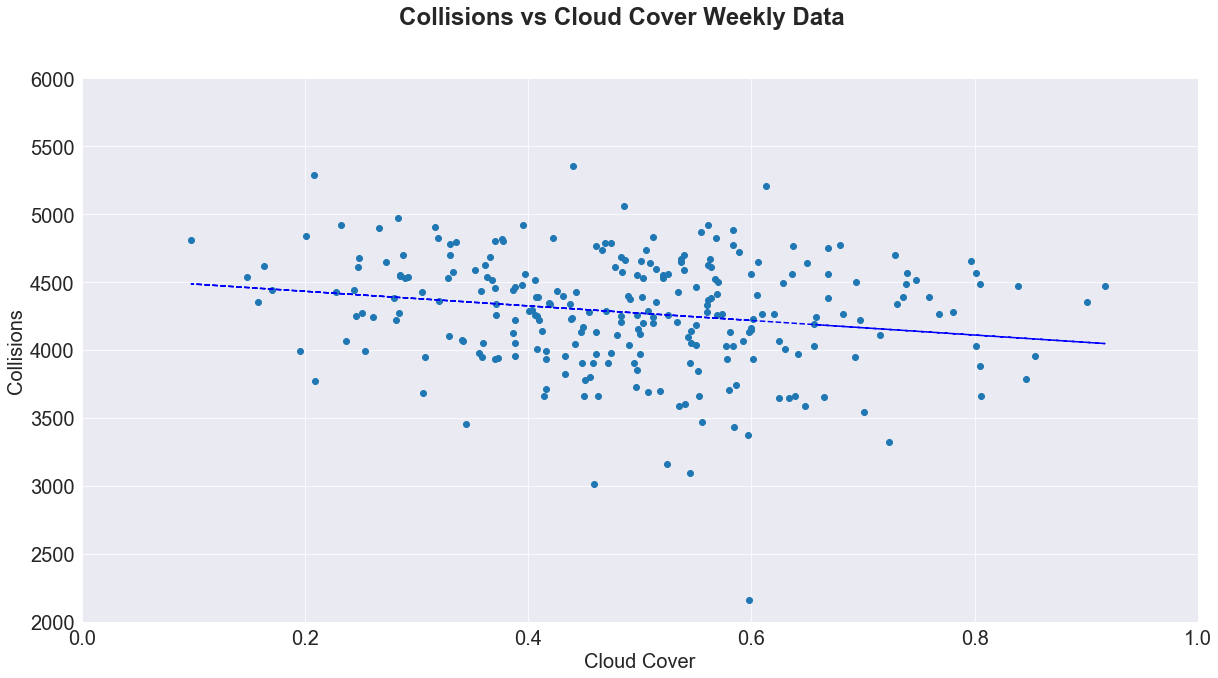

r-squared: 0.026041809054
p value: 0.00900892944306
Standard Error: 203.882355945


In [21]:
(slope, intercept, _, _, _) = linregress(s, z)
fit = slope * s + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Cloud Cover Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Cloud Cover", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(s, z, linewidth=0, marker='o')
ax.plot(s, fit, 'b--')

#plt.savefig("../Images/Collisions vs Weekly Cloud Cover")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(s,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

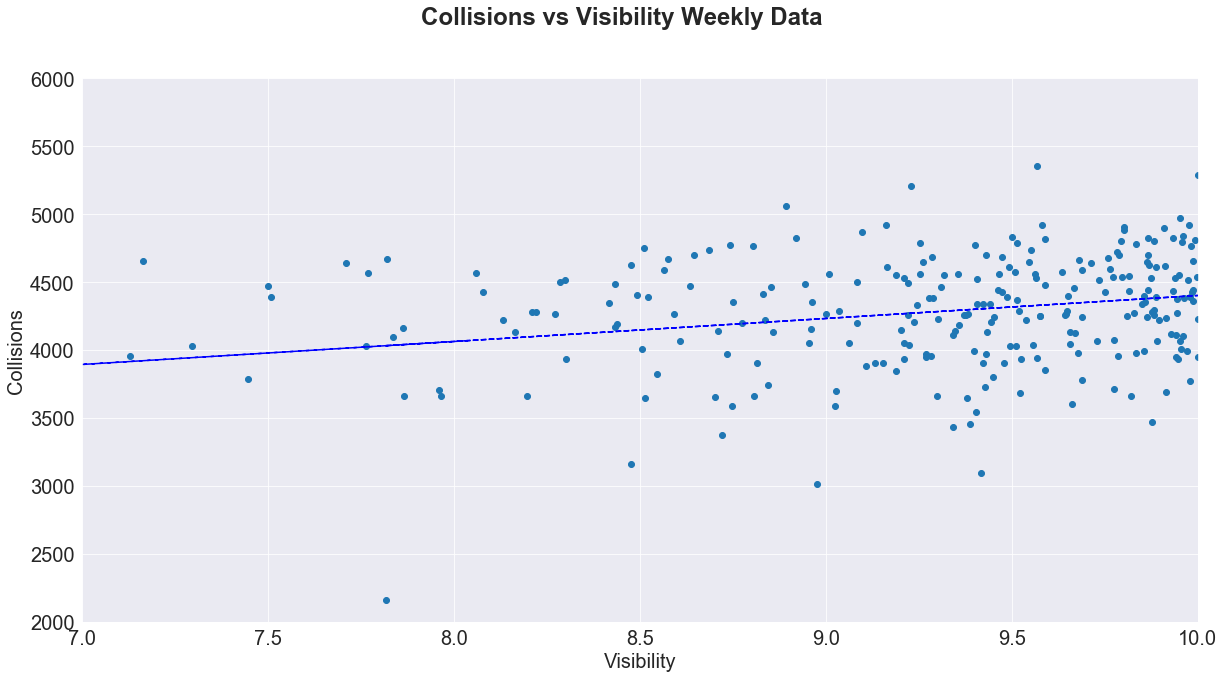

r-squared: 0.0488172369419
p value: 0.000322011626263
Standard Error: 46.4221478684


In [22]:
(slope, intercept, _, _, _) = linregress(t, z)
fit = slope * t + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Visibility Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(7, 10)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Visibility", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(t, z, linewidth=0, marker='o')
ax.plot(t, fit, 'b--')

#plt.savefig("../Images/Collisions vs Weekly Visibility")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(t,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

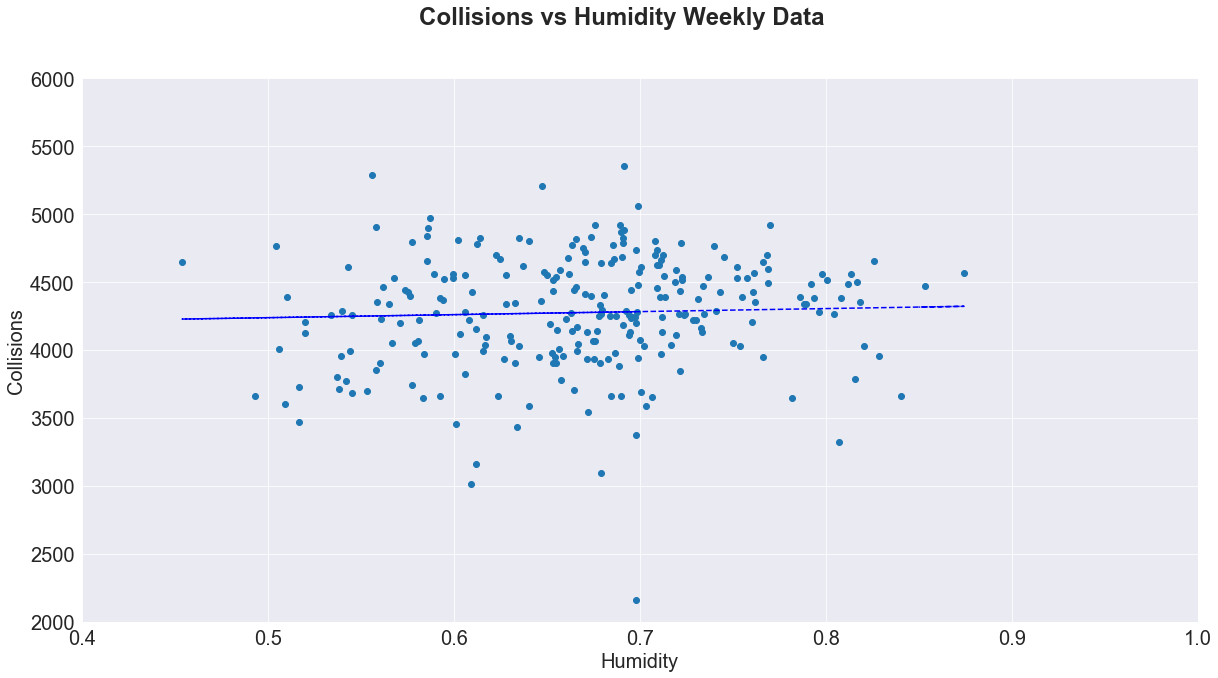

r-squared: 0.00119479452302
p value: 0.578270076128
Standard Error: 401.023386776


In [23]:
(slope, intercept, _, _, _) = linregress(u, z)
fit = slope * u + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Humidity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0.4, 1)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Humidity", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(u, z, linewidth=0, marker='o')
ax.plot(u, fit, 'b--')

#plt.savefig("../Images/Collisions vs Weekly Humidity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(u,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

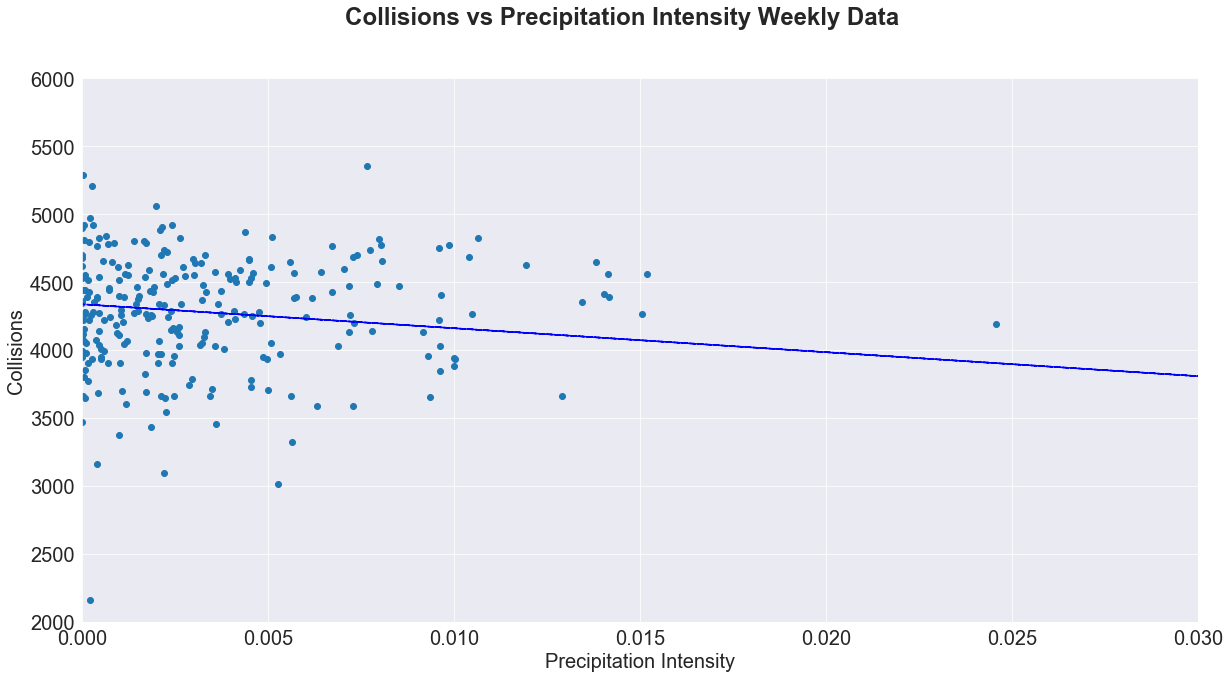

r-squared: 0.0198157875991
p value: 0.0229294755306
Standard Error: 7709.25532113


In [24]:
(slope, intercept, _, _, _) = linregress(v, z)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Precipitation Intensity Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 0.03)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Precipitation Intensity", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(v, z, linewidth=0, marker='o')
ax.plot(v, fit, 'b--')

#plt.savefig("../Images/Collisions vs Weekly Precipitation Intensity")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(v,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

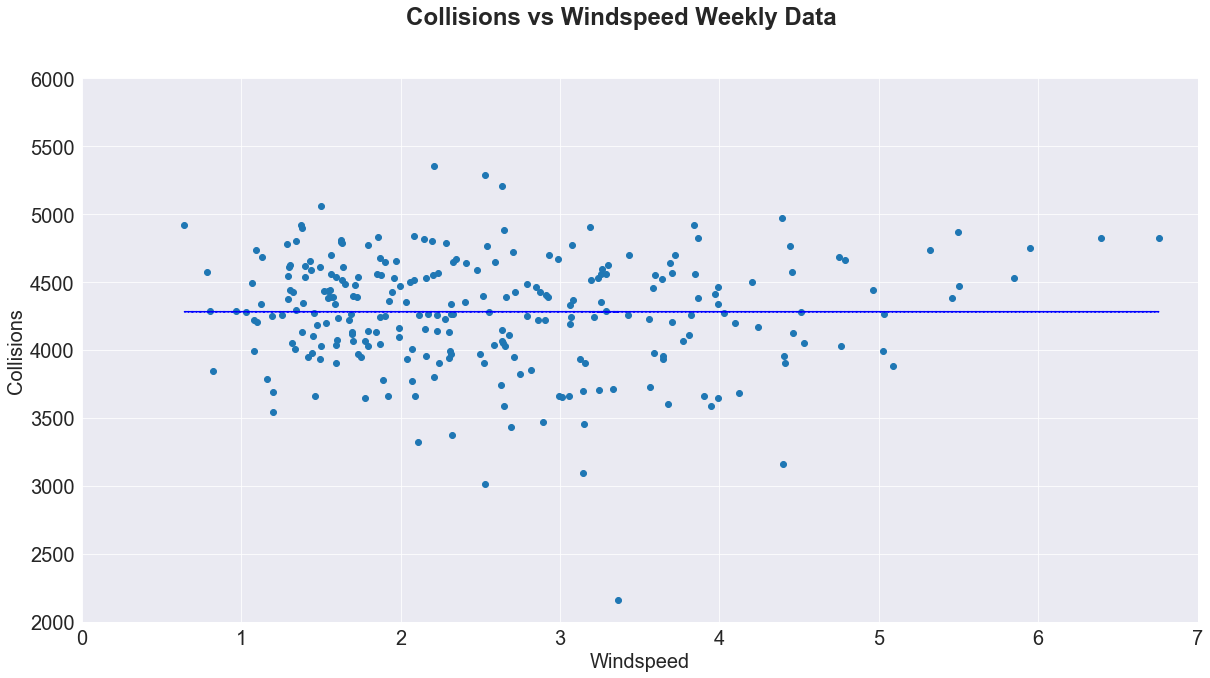

r-squared: 3.00963681367e-05
p value: 0.929714100183
Standard Error: 27.2197130191


In [25]:
(slope, intercept, _, _, _) = linregress(w, z)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Windspeed Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 7)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Windspeed", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(w, z, linewidth=0, marker='o')
ax.plot(w, fit, 'b--')

#plt.savefig("../Images/Collisions vs Windspeed")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(w,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

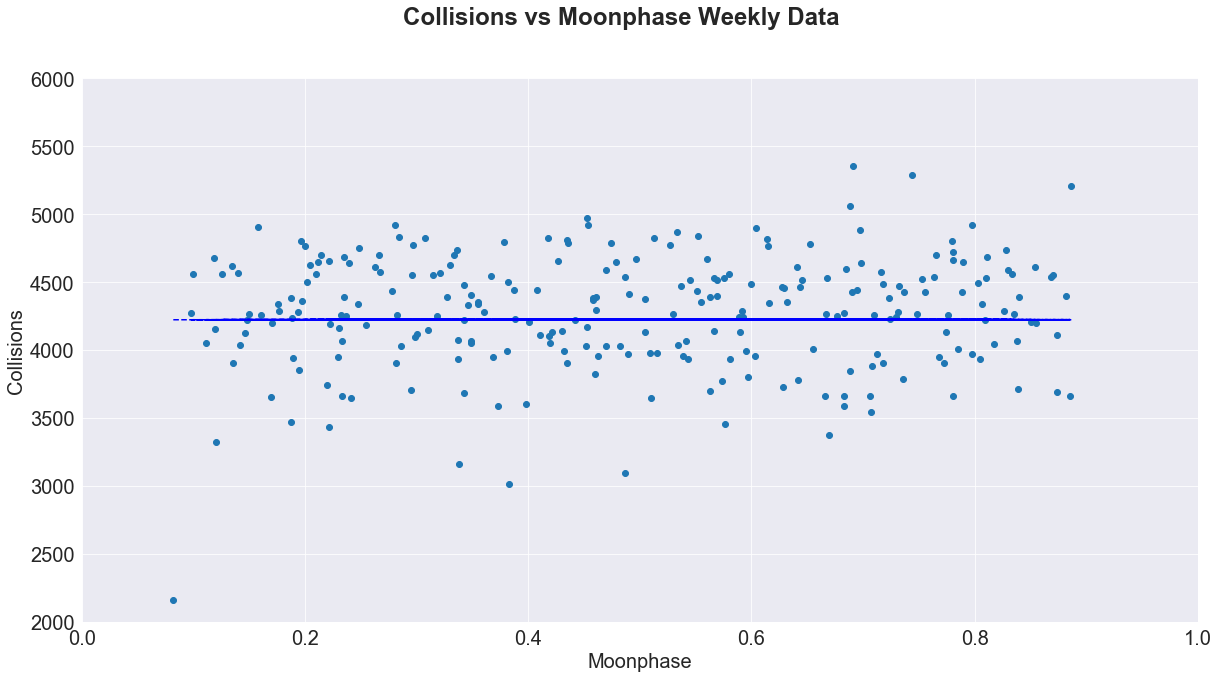

r-squared: 0.00222419989757
p value: 0.448043225962
Standard Error: 141.233296655


In [27]:
(slope, intercept, _, _, _) = linregress(r, z)
fit = slope * v + intercept

fig, ax = plt.subplots()

mpl.rcParams.update({'font.size': 20})

fig.suptitle("Collisions vs Moonphase Weekly Data", fontsize=24, fontweight="bold")

ax.set_xlim(0, 1)
ax.set_ylim(2000, 6000)

ax.set_xlabel("Moonphase", fontsize=20)
ax.set_ylabel("Collisions", fontsize=20)

ax.plot(r, z, linewidth=0, marker='o')
ax.plot(r, fit, 'b--')

#plt.savefig("../Images/Collisions vs Moonphase")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(r,z)
print("r-squared:", r_value**2)
print("p value:", p_value)
print("Standard Error:", std_err)

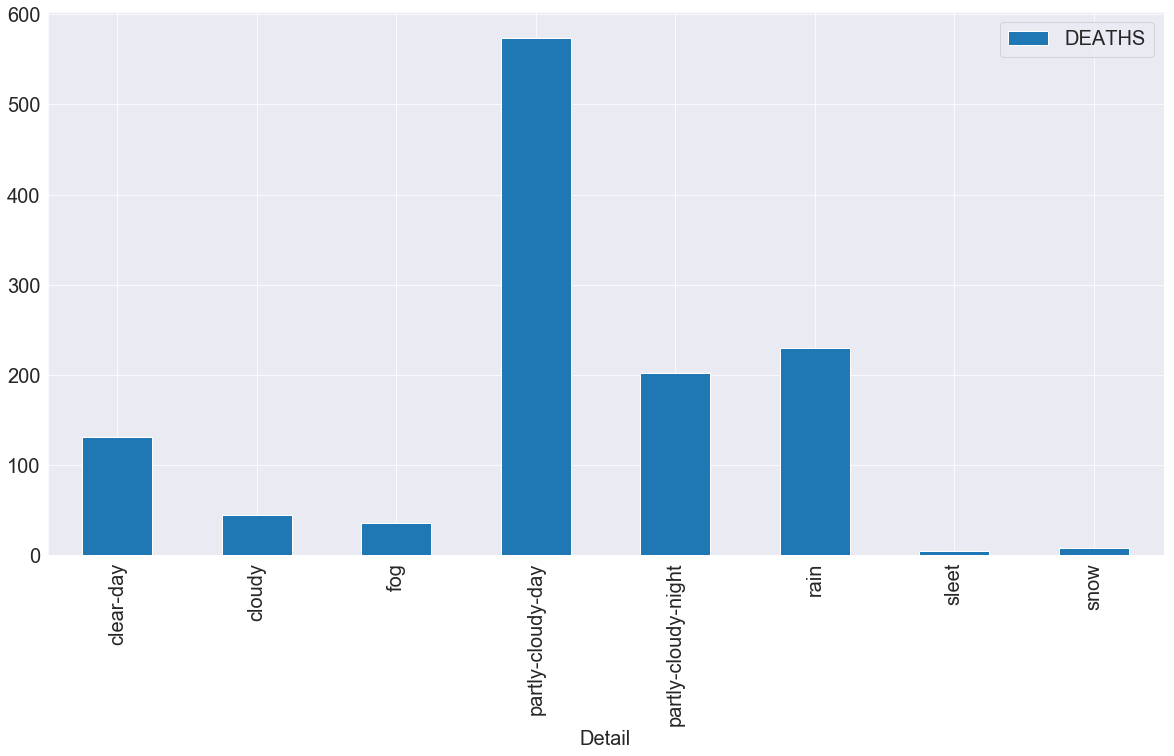

In [40]:
weather_total = master_df.groupby("Detail")['Detail', 'DEATHS'].sum()
weather_total.plot.bar()
plt.show()

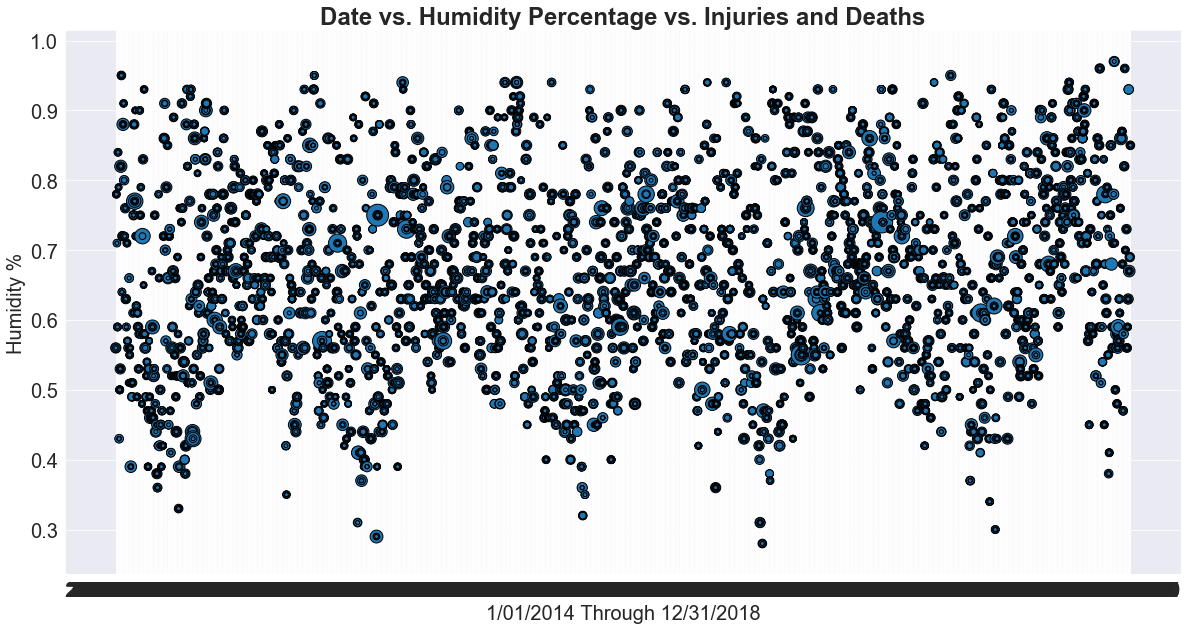

In [50]:
#Create Scatter Plot X=Date, Y=Humidity, s=injruries + Deaths
plt.scatter(master_df['DATE'], master_df['humidity'],s=master_df['DEATHS']+master_df['INJURIES']*15, edgecolor="black")
plt.title(f'Date vs. Humidity Percentage vs. Injuries and Deaths', fontweight="bold")
plt.xlabel('1/01/2014 Through 12/31/2018')
plt.ylabel('Humidity %')
#save figure
#plt.savefig(os.path.join('..', 'reports', 'figures', 'humidityvsdeaths.png'))
#show figure
plt.show()